In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fms = pd.read_csv('../data/FMS.csv')
fms.head()

,position,MC,BG,BGR,BPR,BP,PTS,PTB,year,country,champion
0,1,Meta,4,1,0,0,14,534.0,2023A,CAR,False
1,1,Letra,4,1,0,0,14,882.5,2023B,CAR,True
2,3,Aldair,3,0,1,1,10,513.5,2023A,CAR,False
3,2,SNK,2,1,2,2,10,508.5,2023A,CAR,False
4,2,Ritmodelia,3,0,1,1,10,844.0,2023B,CAR,False


In [4]:
fms.describe()

,position,BG,BGR,BPR,BP,PTS,PTB
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,5.152174,2.677536,1.514493,1.648551,2.402174,12.409420,2163.878623
std,2.995517,1.909118,1.319700,1.575851,1.825435,6.286706,949.221393
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,325.500000
25%,3.000000,1.000000,0.000000,0.000000,1.000000,8.000000,871.125000
50%,5.000000,2.000000,1.000000,1.000000,2.000000,12.000000,2613.500000
75%,7.000000,4.000000,2.000000,3.000000,4.000000,16.000000,2879.500000
max,12.000000,9.000000,6.000000,7.000000,9.000000,30.000000,3546.000000


In [5]:
fms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   position  276 non-null    int64  
 1   MC        276 non-null    object 
 2   BG        276 non-null    int64  
 3   BGR       276 non-null    int64  
 4   BPR       276 non-null    int64  
 5   BP        276 non-null    int64  
 6   PTS       276 non-null    int64  
 7   PTB       276 non-null    float64
 8   year      276 non-null    object 
 9   country   276 non-null    object 
 10  champion  276 non-null    bool   
dtypes: bool(1), float64(1), int64(6), object(3)
memory usage: 22.0+ KB


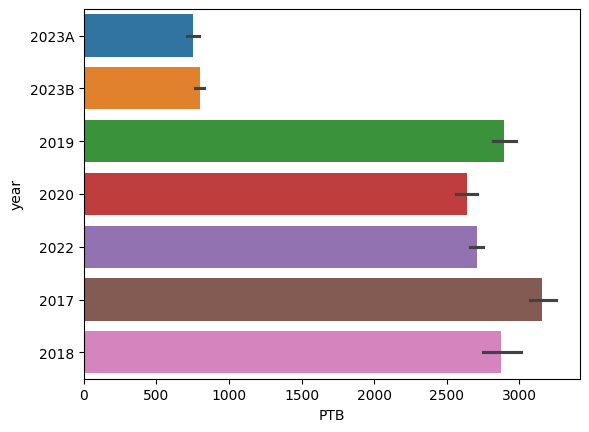

In [6]:
mean_fms = fms.groupby('year').mean("PTB")
sns.barplot(y="year", x="PTB",hue="year", data=fms)
plt.show()

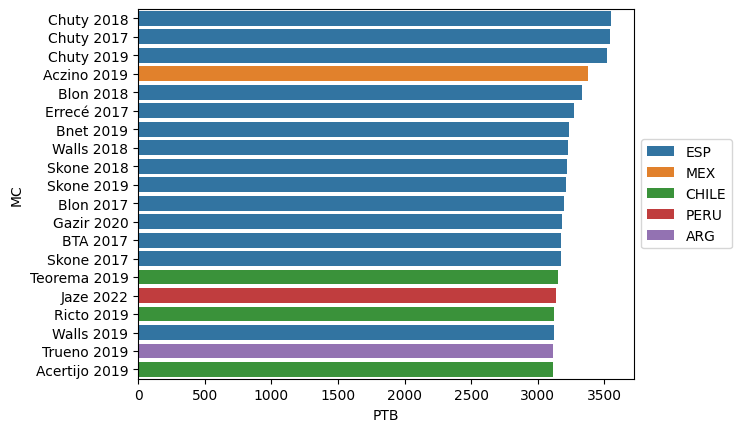

In [19]:
top_10_PTB = fms.sort_values("PTB",ascending=False).head(20)
top_10_PTB["MC"] = top_10_PTB["MC"] + " " + top_10_PTB["year"]
sns.barplot(y="MC", x="PTB",hue="country", data=top_10_PTB)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

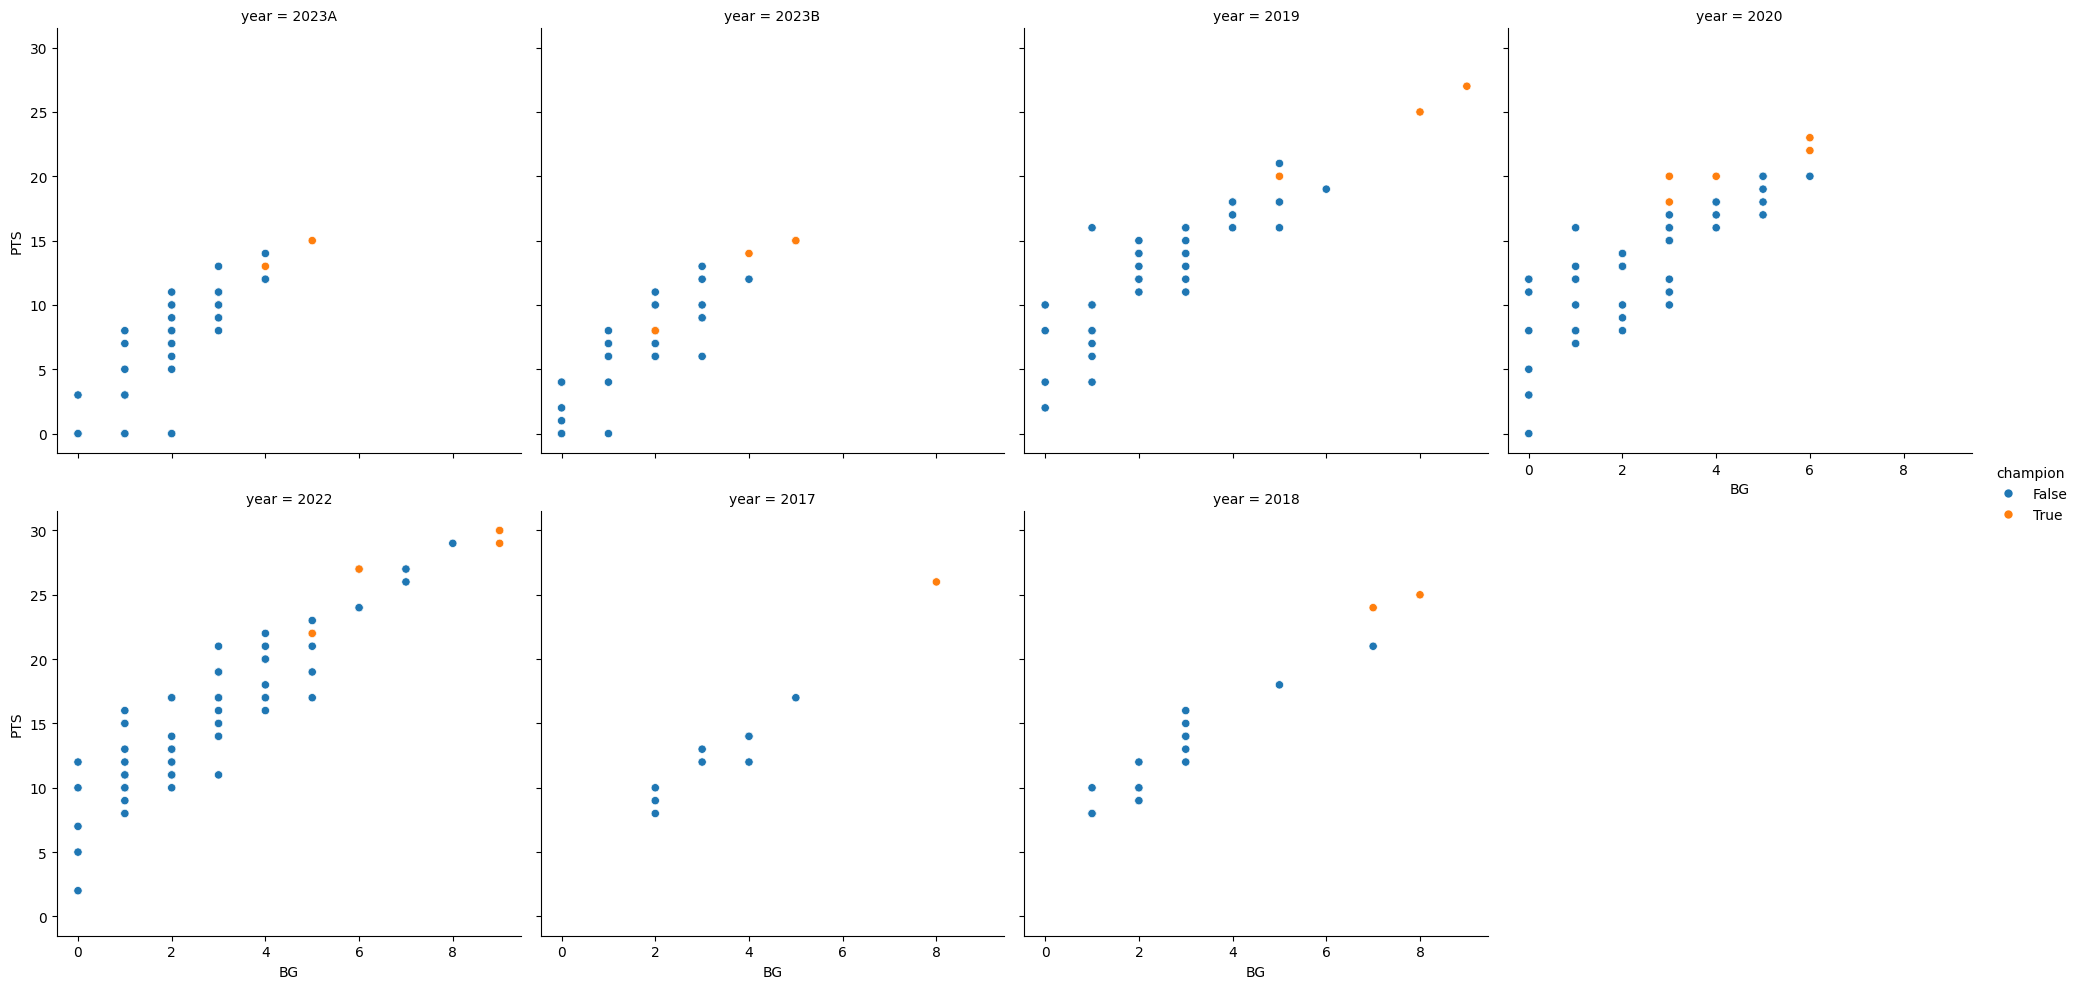

In [8]:
sns.relplot(data=fms,
                x="BG",
                y="PTS",
                col="year",
                hue="champion",
                col_wrap=4)


plt.show()

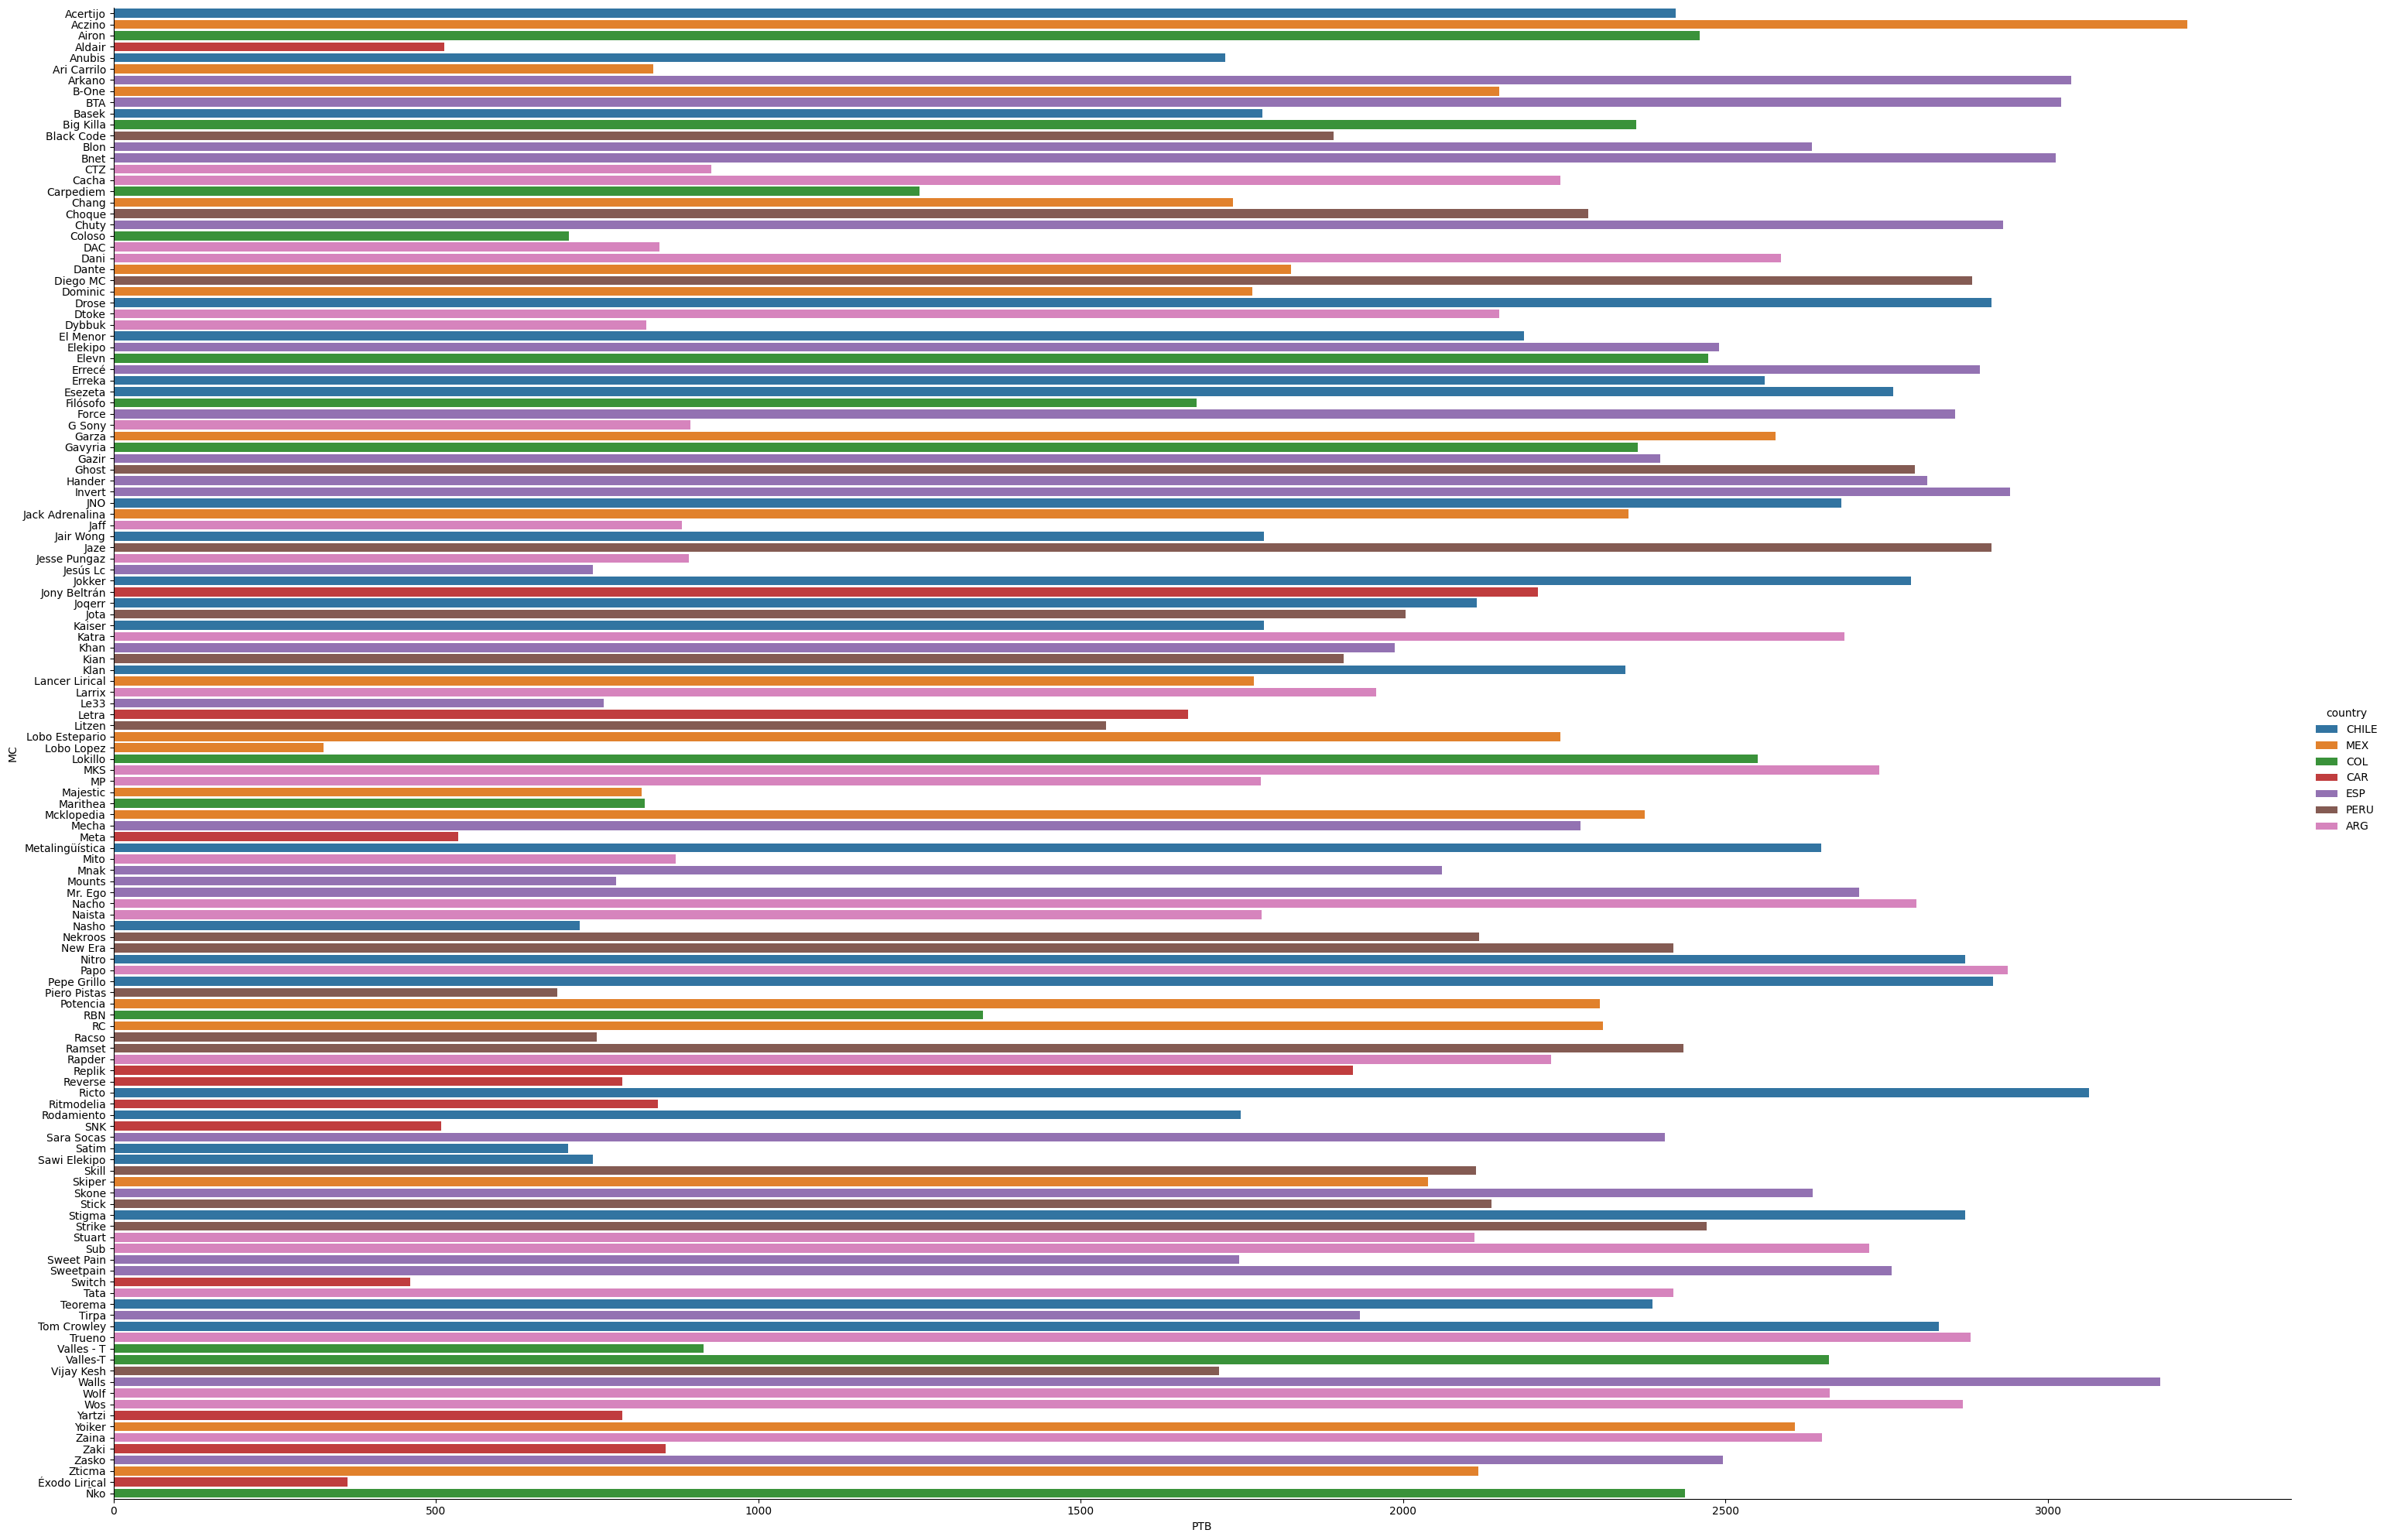

In [9]:
mean_mc_fms = fms.groupby('MC').agg({
    "PTB": "mean",
    "country": "first"
})

sns.catplot(y="MC", x="PTB", hue="country", data=mean_mc_fms, kind="bar", aspect=1.5, height=20)
plt.show()

In [10]:
fms.sort_values("PTB",ascending=False).head(20)

,position,MC,BG,BGR,BPR,BP,PTS,PTB,year,country,champion
66,1,Chuty,7,1,1,0,24,3546.0,2018,ESP,True
56,1,Chuty,8,1,0,0,26,3544.0,2017,ESP,True
76,1,Chuty,8,0,1,0,25,3523.0,2019,ESP,True
174,1,Aczino,9,0,0,0,27,3374.0,2019,MEX,True
69,4,Blon,3,2,2,2,14,3333.0,2018,ESP,False
60,5,Errecé,3,1,2,3,13,3273.0,2017,ESP,False
78,3,Bnet,6,0,1,2,19,3233.0,2019,ESP,False
67,2,Walls,5,0,2,1,18,3226.0,2018,ESP,False
68,3,Skone,3,3,1,2,16,3220.0,2018,ESP,False
77,2,Skone,5,3,0,1,21,3215.0,2019,ESP,False


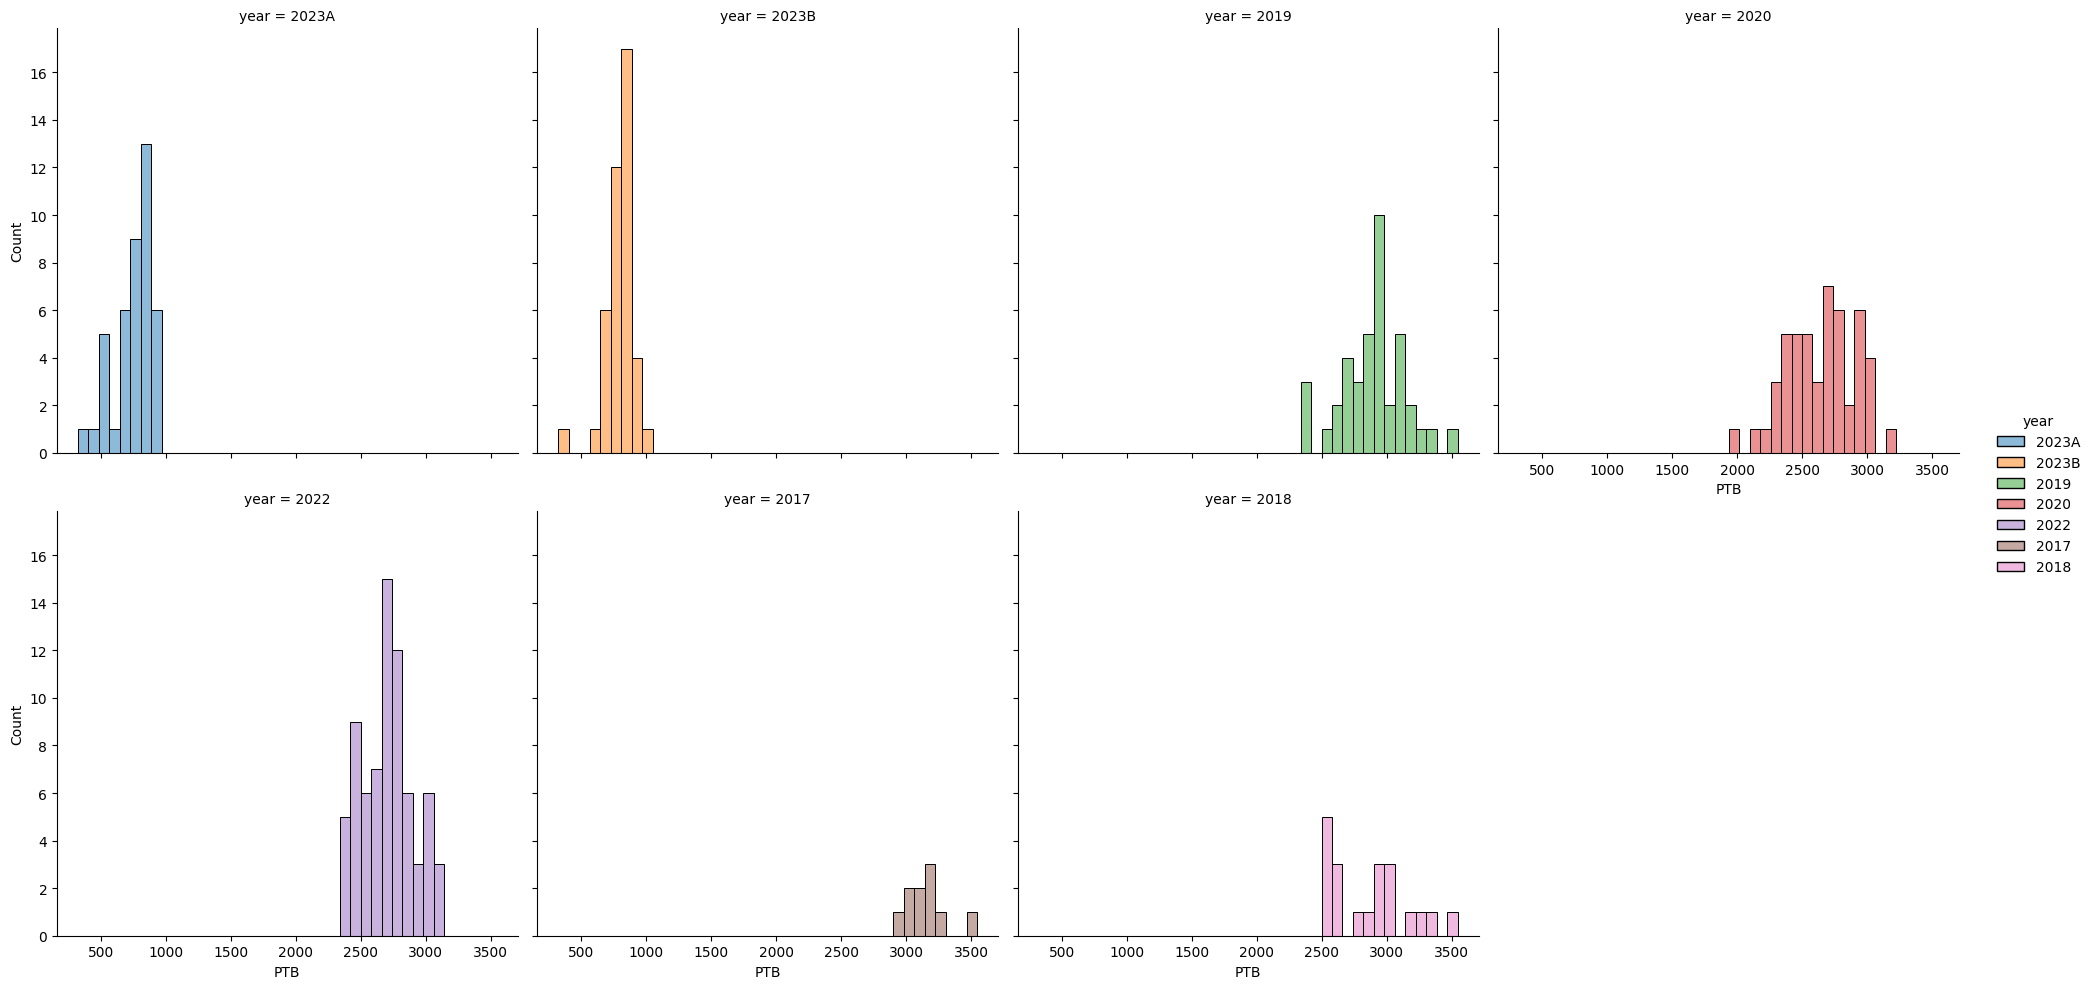

In [11]:
sns.displot(fms, x="PTB", hue="year", kind="hist", fill=True, col="year", col_wrap=4, bins=40)
plt.show()

In [14]:
import scipy.stats as stats

for year in fms["year"].unique():
    result = stats.anderson(fms[fms["year"] == year]["PTB"])
    print(f'Año: {year}')
    print('Statistics=%.3f' % result.statistic)
    print('Valores críticos:', result.critical_values)
    print('Niveles de significancia:', result.significance_level)
    print("Es normal la distribución" if result.statistic < result.critical_values[2] else "No es normal la distribución")
    print()

Año: 2023A
Statistics=1.096
Valores críticos: [0.533 0.607 0.728 0.849 1.01 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No es normal la distribución

Año: 2023B
Statistics=0.642
Valores críticos: [0.533 0.607 0.728 0.849 1.01 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Es normal la distribución

Año: 2019
Statistics=0.232
Valores críticos: [0.531 0.605 0.726 0.847 1.007]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Es normal la distribución

Año: 2020
Statistics=0.273
Valores críticos: [0.538 0.613 0.736 0.858 1.021]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Es normal la distribución

Año: 2022
Statistics=0.785
Valores críticos: [0.548 0.624 0.749 0.874 1.039]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No es normal la distribución

Año: 2017
Statistics=0.636
Valores críticos: [0.501 0.57  0.684 0.798 0.95 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Es normal la distribución

Año: 2018
Statistics=0.771
Valores críticos: [0.50